In [1]:
import sys
dir_repo = '../'
sys.path.append(dir_repo)

from galaxy_generator.utils import get_config_from_yaml
from galaxy_generator.dcgan_generator import DCGAN_Generator

config = get_config_from_yaml(dir_repo+'configs/dcgan_run0.yaml')

generator = DCGAN_Generator(config=config)


------ Parameters ------

exp_name : dcgan_run0
cuda : True
ngpu : 1
gpu_device : 0
workers : 2
dir_image : /home/hhg/Research/galaxyClassify/catalog/galaxyZoo_kaggle/gz2_images/images
file_csv : /home/hhg/Research/galaxyClassify/catalog/galaxyZoo/zoo2/gz2_all_v2.csv
label_tag : label_8
num_classes : 8
class_weights : [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
seed : 3
norm_mean : [0.094, 0.0815, 0.063]
norm_std : [0.1303, 0.11, 0.0913]
crop_size : 224
input_size : 64
n_channel : 3
n_zlatent : 50
n_filter_G : 64
n_filter_D : 64
num_epochs : 30
batch_size : 64
lr_G : 0.001
lr_D : 0.001
beta1 : 0.5
beta2 : 0.999
step_size_G : 5
step_size_D : 5
gamma_G : 0.1
gamma_D : 0.1
dir_output : /home/hhg/Research/galaxyClassify/repo/GalaxyZooGenerator/experiments
nrow : 8
dpi : 100
freq_img : 500

------ Prepare Data ------

Number of training galaxies: 155951 (2437 batches)

------ Build Model ------

Number of trainable parameters
Generator  : 3167104
Discriminator  : 3167104


## Load the `trainInfo` file

- ``trainInfo`` stores the resulting generator and discrimintor losses at each iteration (`loss_G`, `loss_D`), the averaged losses at each epoch (`epoch_loss_G`, `epoch_loss_D`), as well ad the learning rate used (`lr_G`, `lr_D`). 

In [2]:
import pickle

trainInfo = pickle.load(file = open(generator.file_trainInfo, 'rb'))

In [3]:
trainInfo.keys()

dict_keys(['loss_G', 'loss_D', 'epoch_loss_G', 'epoch_loss_D', 'lr_G', 'lr_D'])

## Display Training Losses and Learning Rate

In [4]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, AutoMinorLocator
import numpy as np
%matplotlib inline
%config InlineBackend.figure_format='retina'

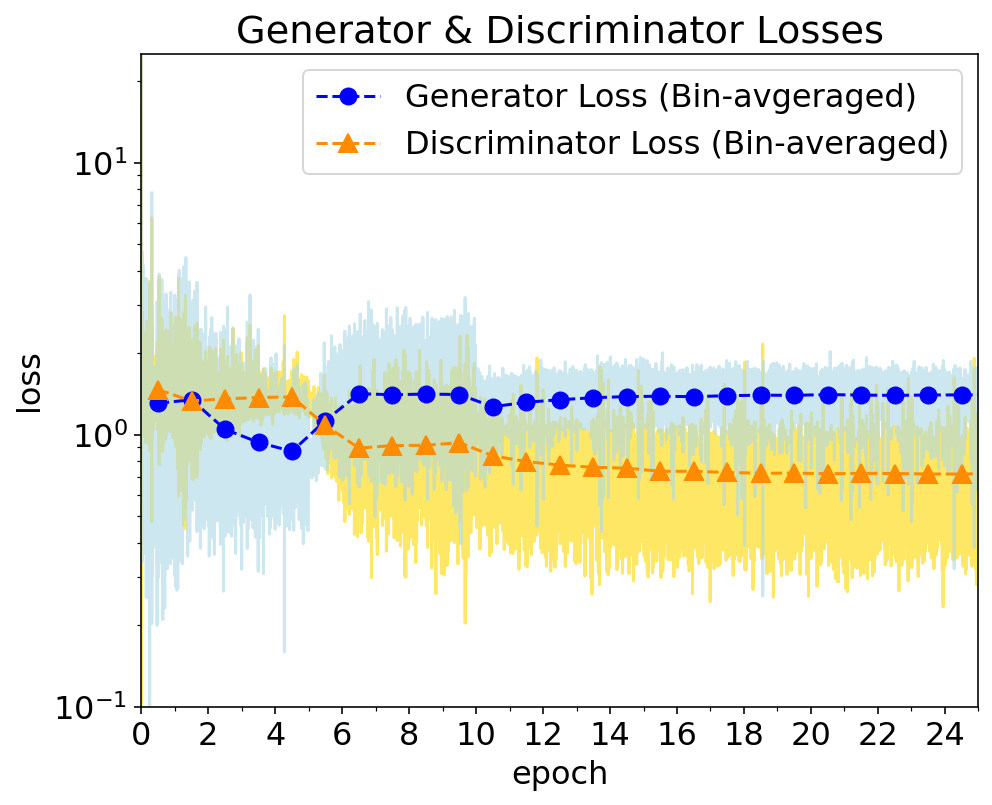

In [5]:
###### Parameters ######
end = 25
########################

plt.rc('font', size=16)
fig, ax = plt.subplots(1, 1, figsize=(7.5, 6))

iter_tick = np.array(range(len(trainInfo['loss_G'])))/len(generator.dataloader)

epoch_tick = np.array(range(len(trainInfo['epoch_loss_G'])))+0.5

ax.plot(iter_tick , trainInfo['loss_G'], color='lightblue', alpha=0.6, zorder=-1)
ax.plot(epoch_tick, trainInfo['epoch_loss_G'], 'o--', label='Generator Loss (Bin-avgeraged)', color='b', markersize=8)

ax.plot(iter_tick, trainInfo['loss_D'], color='gold', alpha=0.6, zorder=-2)
ax.plot(epoch_tick, trainInfo['epoch_loss_D'], '^--', label='Discriminator Loss (Bin-averaged)', color='darkorange', markersize=9)

ax.set_title(f'Generator & Discriminator Losses')

ax.set_yscale('log')
ax.set_ylabel('loss')
ax.set_xlabel('epoch')
ax.set_xlim([0, end])
ax.set_ylim([0.1, end])
ax.xaxis.set_major_locator(MultipleLocator(2))
# For the minor ticks, use no labels; default NullFormatter.
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.legend()

# file_fig = '/home/hhg/Research/galaxyClassify/repo/GalaxyZooGenerator/out_loss.png'
# fig.savefig(file_fig, dpi=300, transparent=False, facecolor='white')

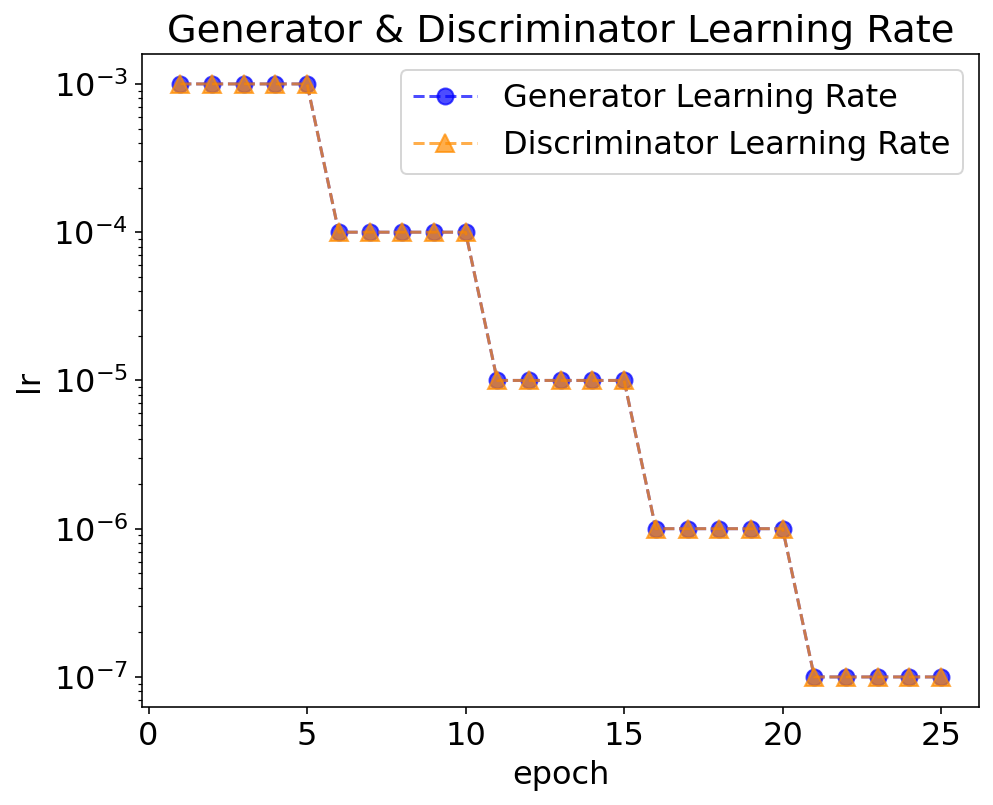

In [6]:
plt.rc('font', size=16)
fig, ax = plt.subplots(1, 1, figsize=(7.5, 6))

epoch_tick = np.array(range(len(trainInfo['lr_G']))) + 1

ax.plot(epoch_tick[:end], trainInfo['lr_G'][:end], 'o--', label='Generator Learning Rate', color='b', markersize=8, alpha=0.7)
ax.plot(epoch_tick[:end], trainInfo['lr_D'][:end], '^--', label='Discriminator Learning Rate', color='darkorange', markersize=9, alpha=0.7)

ax.set_title(f'Generator & Discriminator Learning Rate')


ax.set_yscale('log')
ax.set_ylabel('lr')
ax.set_xlabel('epoch')
ax.legend()

file_fig = '/home/hhg/Research/galaxyClassify/repo/GalaxyZooGenerator/out_lr.png'
fig.savefig(file_fig, dpi=300, transparent=False, facecolor='white')
#plt.close(fig)

## Draw Galaxy Images

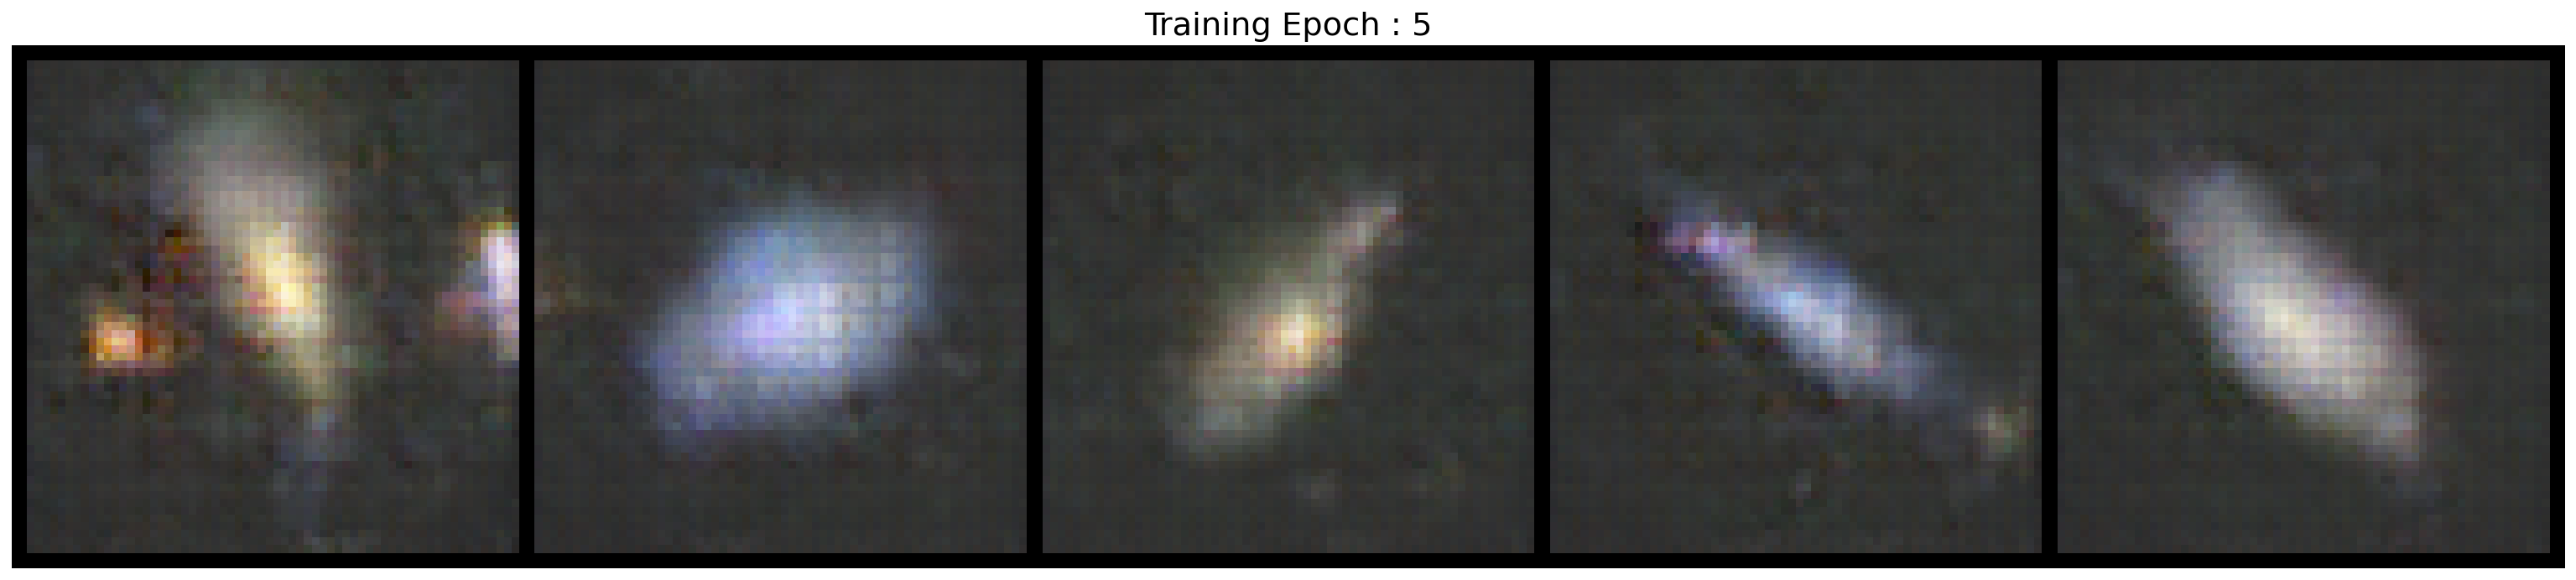

In [7]:
Ngals = 5
epochID = 4
nrow = 1
img_grid = generator.gen_galaxy(Ngals, epochID, nrow=nrow)

# ------ plots ------
fig = plt.figure( figsize=(5*(Ngals//nrow), 5.1*nrow) )
plt.axis("off")
plt.imshow(img_grid)
plt.title(f'Training Epoch : {epochID+1}')
plt.tight_layout()

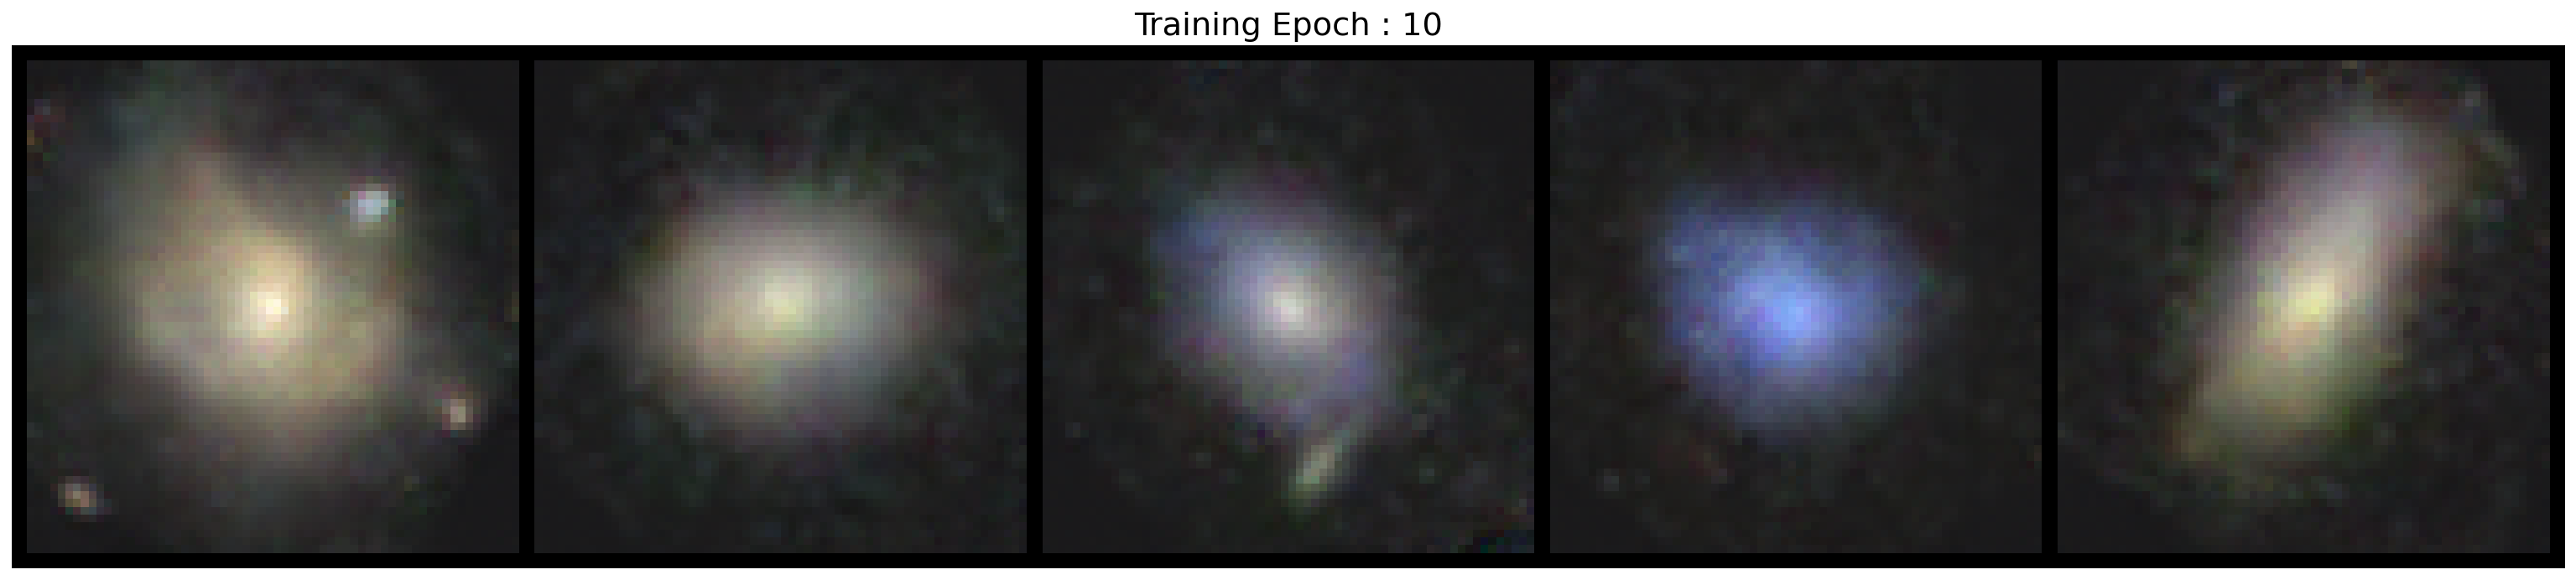

In [8]:
Ngals = 5
epochID = 9
nrow = 1
img_grid = generator.gen_galaxy(Ngals, epochID, nrow=nrow)

# ------ plots ------
fig = plt.figure( figsize=(5*(Ngals//nrow), 5.1*nrow) )
plt.axis("off")
plt.imshow(img_grid)
plt.title(f'Training Epoch : {epochID+1}')
plt.tight_layout()

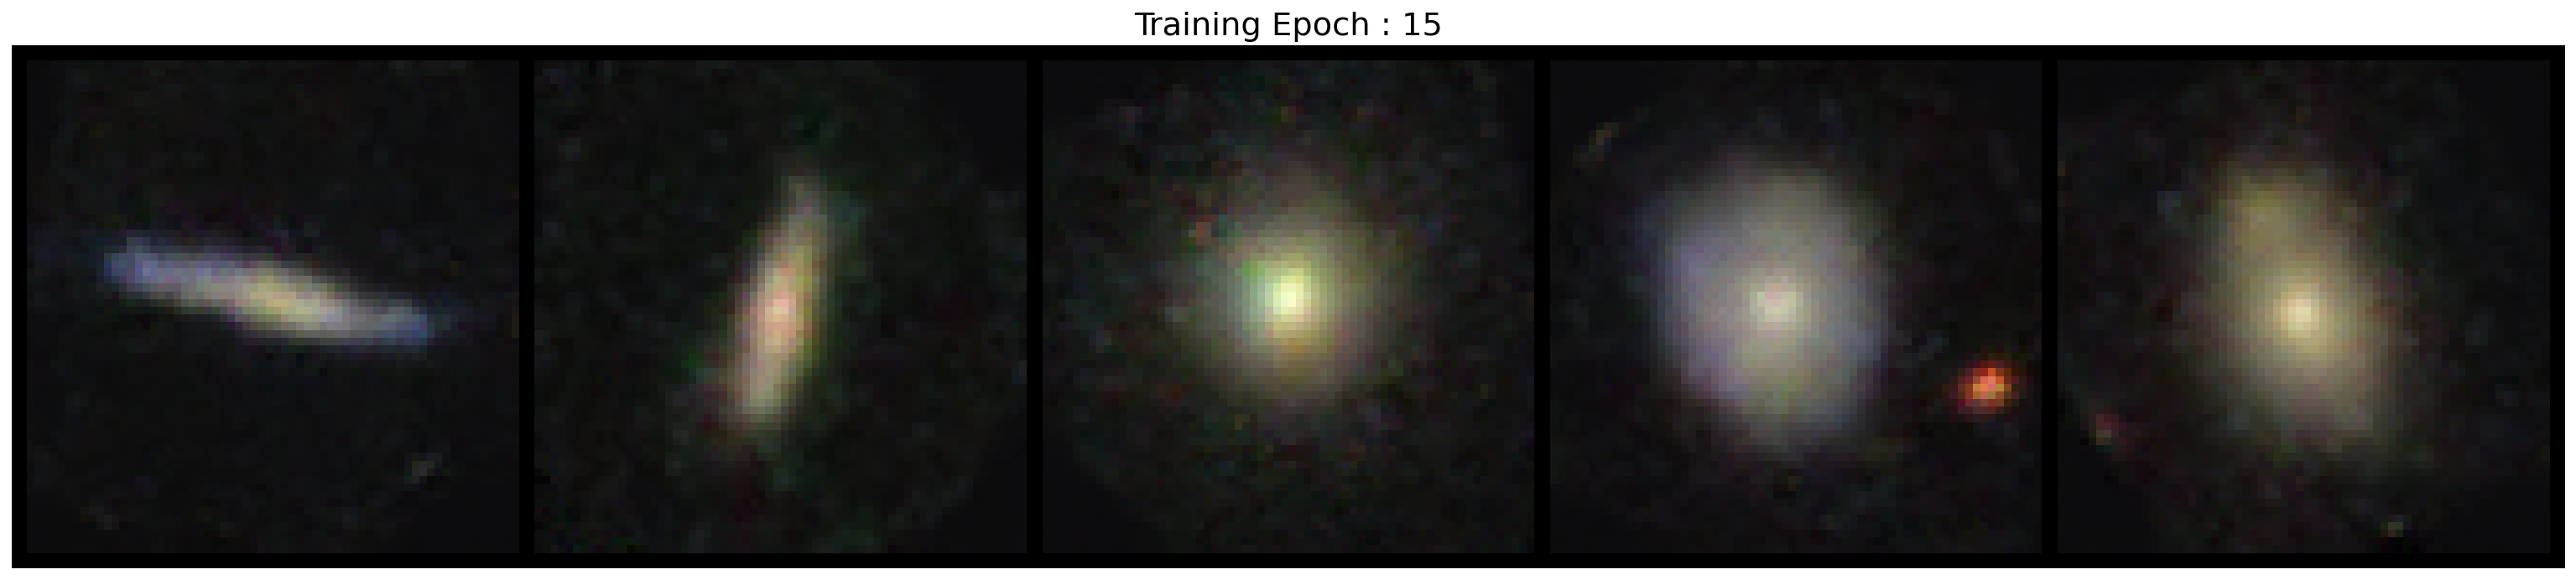

In [9]:
Ngals = 5
epochID = 14
nrow = 1
img_grid = generator.gen_galaxy(Ngals, epochID, nrow=nrow)

# ------ plots ------
fig = plt.figure( figsize=(5*(Ngals//nrow), 5.1*nrow) )
plt.axis("off")
plt.imshow(img_grid)
plt.title(f'Training Epoch : {epochID+1}')
plt.tight_layout()

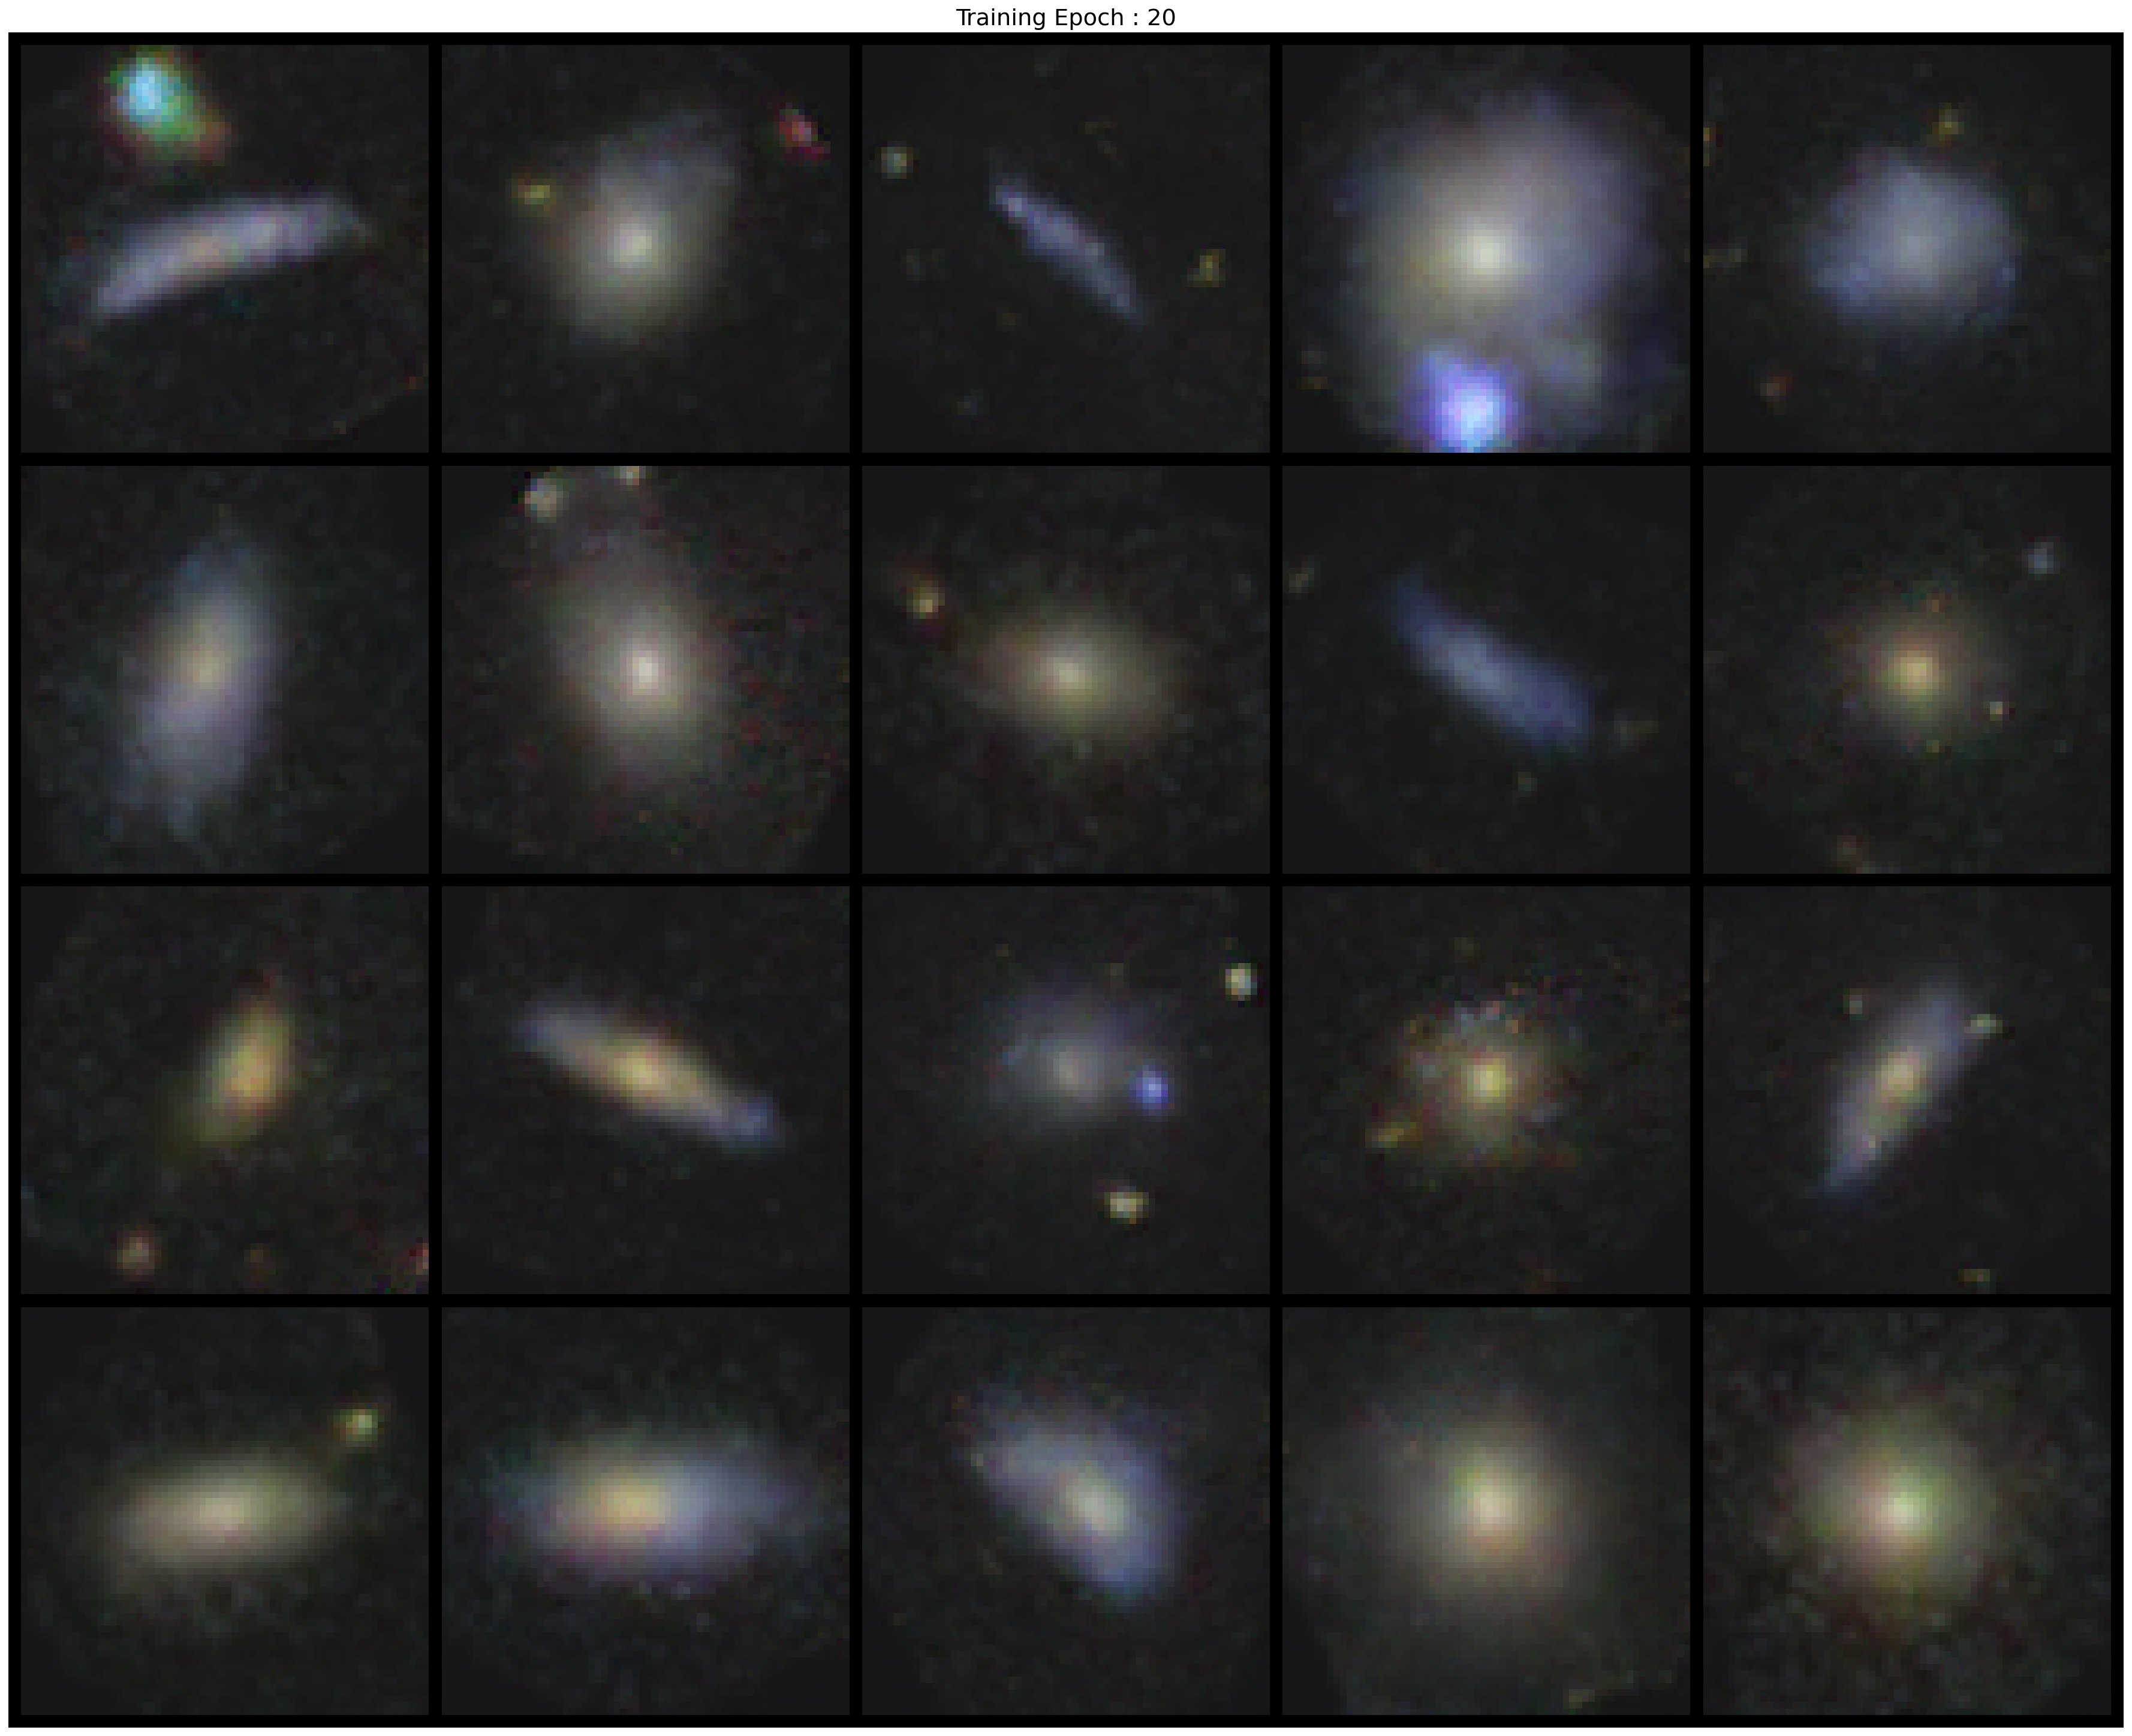

In [10]:
Ngals = 20
epochID = 19
nrow = 4
img_grid = generator.gen_galaxy(Ngals, epochID, nrow=nrow)

# ------ plots ------
fig = plt.figure( figsize=(5*(Ngals//nrow), 5.1*nrow) )
plt.axis("off")
plt.imshow(img_grid)
plt.title(f'Training Epoch : {epochID+1}')
plt.tight_layout()

### Zoom-in display of generated fake galaxy images

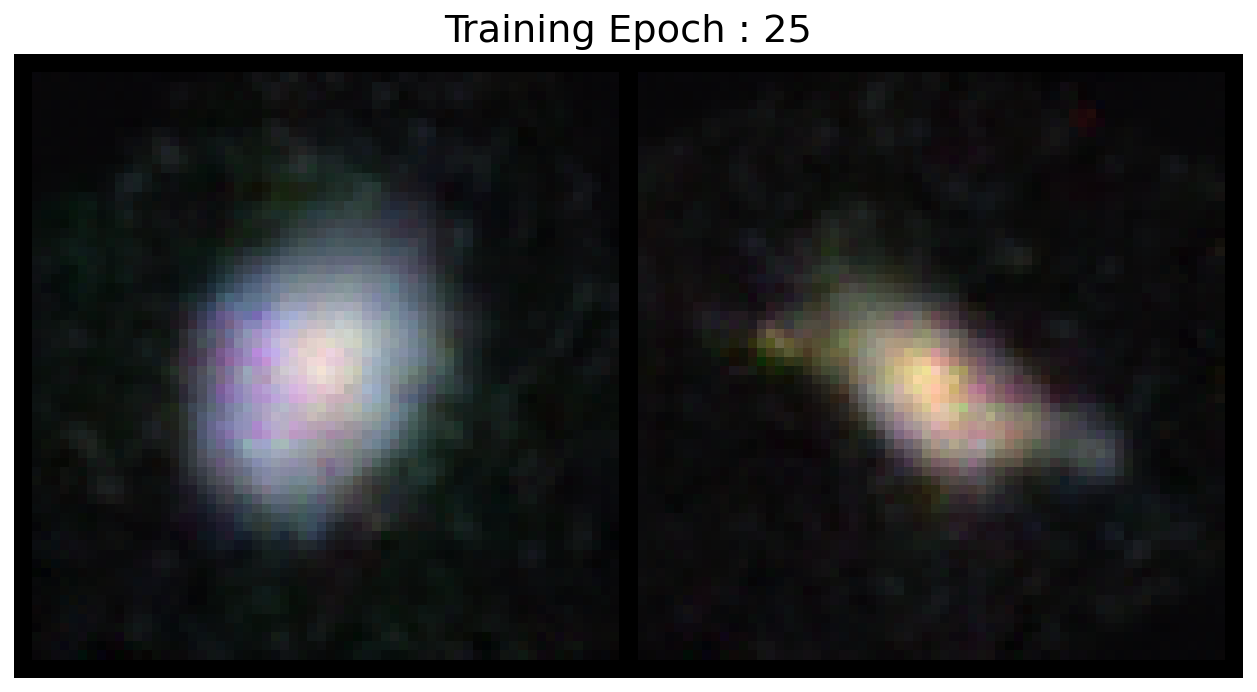

In [11]:
Ngals = 2
epochID = 24
nrow = 1
img_grid = generator.gen_galaxy(Ngals, epochID, nrow=nrow)

# ------ plots ------
fig = plt.figure( figsize=(5*(Ngals//nrow), 5.1*nrow) )
plt.axis("off")
plt.imshow(img_grid)
plt.title(f'Training Epoch : {epochID+1}')
plt.tight_layout()